In [2]:
#Se importan las librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, max_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.cluster import KMeans


In [3]:
#Se leen los datos
Datos = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/typed_uanl.csv')

In [4]:
#Se modifica el conjunto de datos para obtener las agrupaciones que se desean para usar lo datos en los modelos:
sueldo_dependencia = Datos.groupby(["dependencia", "Fecha", "Tipo"])[["Sueldo Neto"]].agg({'Sueldo Neto': ['sum', 'count', 'mean']})
sueldo_dependencia.reset_index(inplace=True)
sueldo_dependencia.columns = ['dependencia','fecha', 'tipo', 'sueldo_neto', 'num_empleados', 'media_pago']
sueldo_dependencia['Pago_Diario_promedio'] = (sueldo_dependencia['media_pago']*12)/365
sueldo_dependencia["fecha"] = pd.to_datetime(sueldo_dependencia["fecha"])
sueldo_dependencia['año'] = sueldo_dependencia['fecha'].dt.year
sueldo_dependencia = sueldo_dependencia.loc[sueldo_dependencia['año'] != 2024]
sueldo_dependencia = sueldo_dependencia.groupby(["dependencia", "tipo"]).agg({'media_pago': ['mean'], 'num_empleados': 'mean', 'Pago_Diario_promedio': 'mean' })
sueldo_dependencia.reset_index(inplace=True)
sueldo_dependencia.columns = ['dependencia', 'tipo', 'sueldo_neto', 'num_empleados', 'pago_diario_promedio']
sueldo_dependencia['num_empleados'] = round(sueldo_dependencia['num_empleados'])

In [5]:
#Se mantienen los datos a utilizar en el modelo de clasificación, en este caso se guardan los datos donde se incluye el tipo de facultad y preparatoria:
model3 = sueldo_dependencia.loc[(sueldo_dependencia['tipo'] == 'PREPARATORIA') | (sueldo_dependencia['tipo'] == 'FACULTAD')]
model3_x = model3.drop(['dependencia', 'tipo', 'sueldo_neto'], axis = 1, inplace = False)
model3_y = model3.drop(['dependencia', 'sueldo_neto', 'num_empleados', 'pago_diario_promedio'], axis = 1, inplace = False)

In [6]:
model3_xtrain, model3_xtest, model3_ytrain, model3_ytest = train_test_split(model3_x, model3_y, test_size=0.2, random_state=73)
model3_decision_tree = DecisionTreeClassifier(max_depth=30, random_state=40)
model3_decision_tree = model3_decision_tree.fit(model3_xtrain, model3_ytrain)
model3_ypred = model3_decision_tree.predict(model3_xtest)
model3_accuracy = accuracy_score(model3_ytest, model3_ypred)
model3_class_report = classification_report(model3_ytest, model3_ypred)
print("Accuracy", model3_accuracy)
print(model3_class_report)

Accuracy 0.45454545454545453
              precision    recall  f1-score   support

    FACULTAD       0.38      0.75      0.50         4
PREPARATORIA       0.67      0.29      0.40         7

    accuracy                           0.45        11
   macro avg       0.52      0.52      0.45        11
weighted avg       0.56      0.45      0.44        11



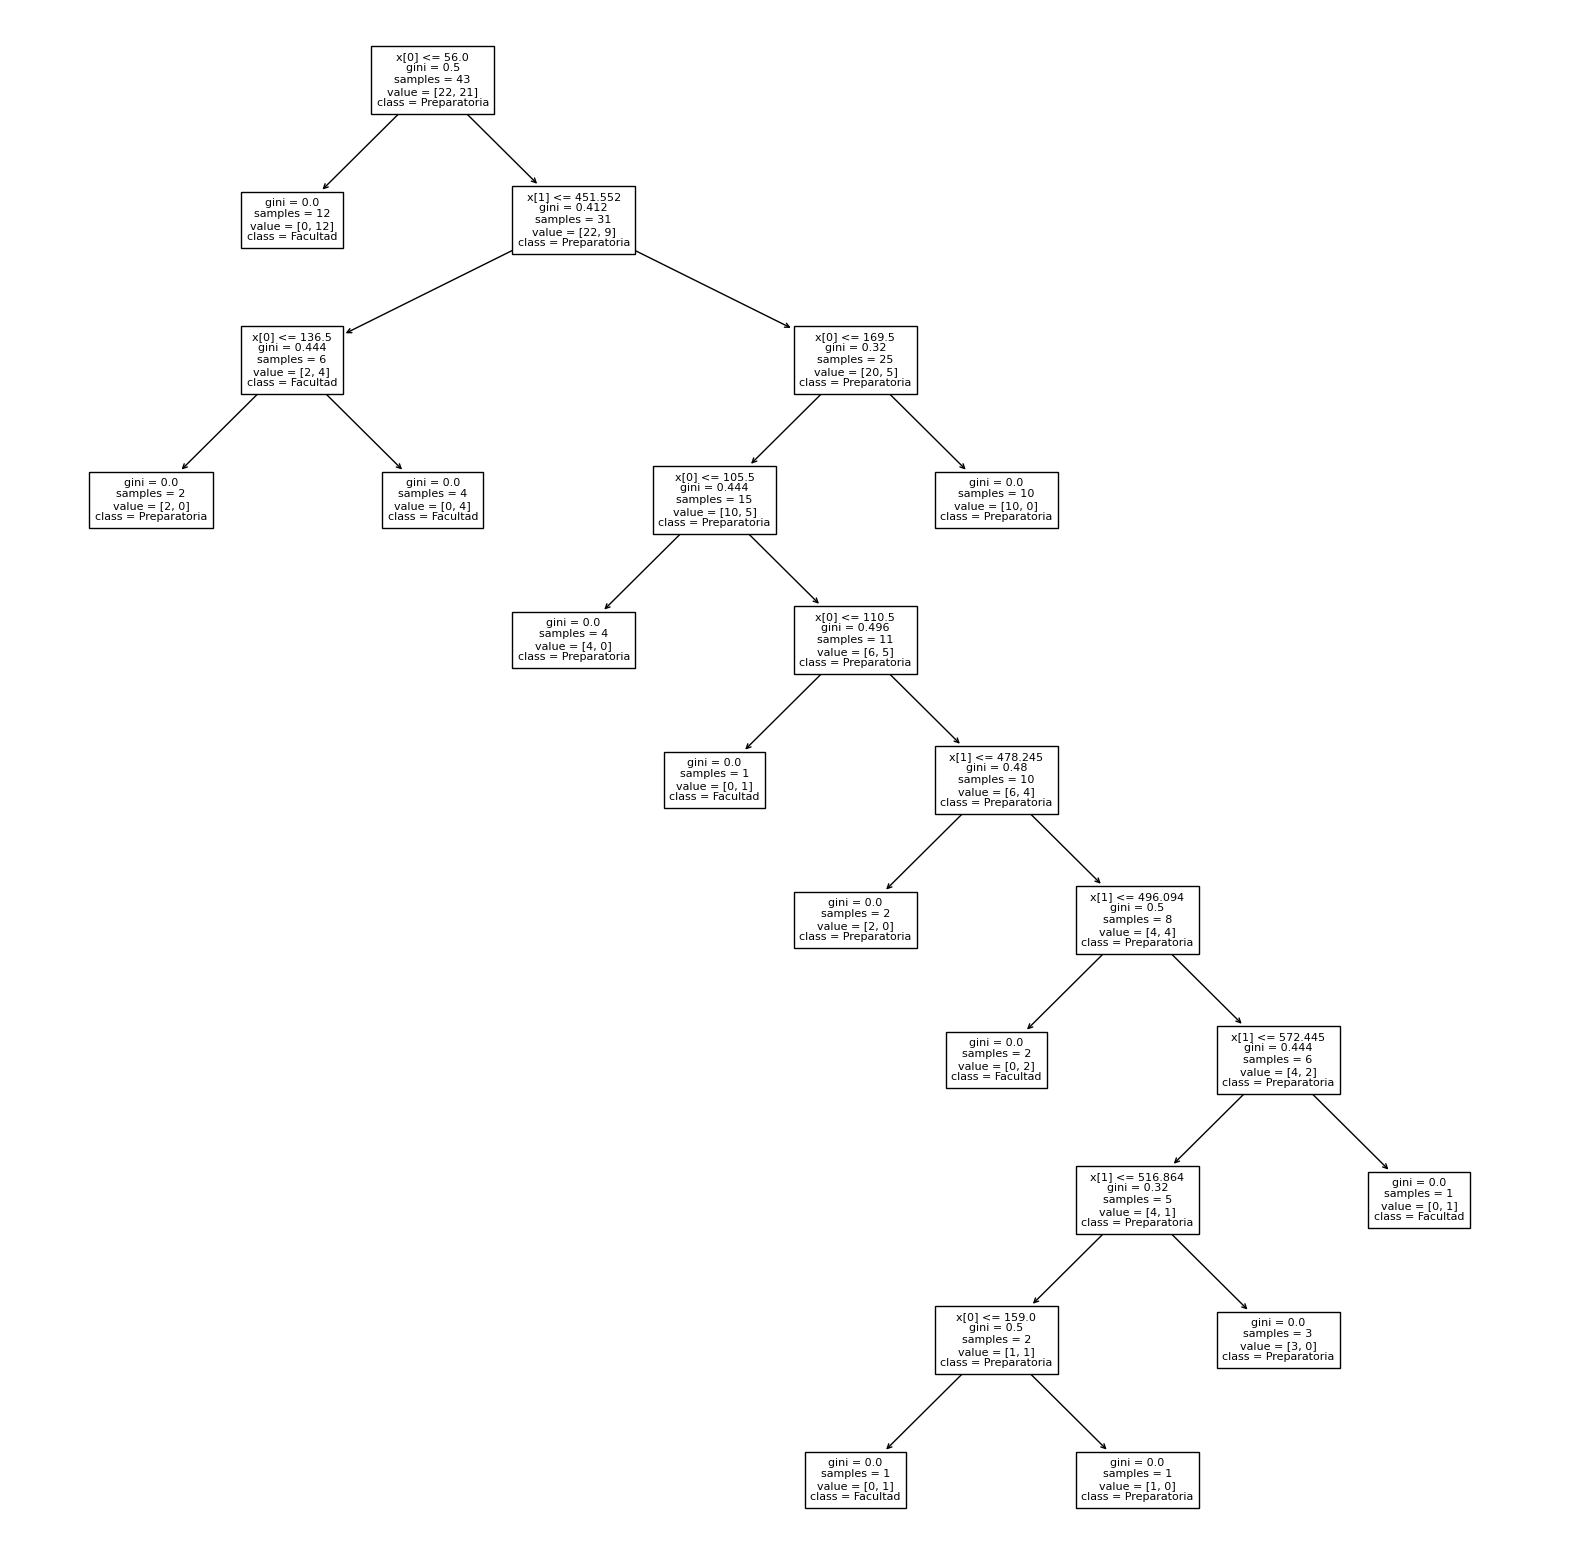

In [7]:
#Se muestra el arbol generado:
plt.figure(figsize=(20, 20))
tree.plot_tree(model3_decision_tree, class_names=['Preparatoria', 'Facultad'], fontsize=8)
plt.show()

In [8]:
#Usando los datos anteriores se hará uso de las validación cruzada para poder encontrar el mejor modelo de acuerdo al valor obtenido de recall:
arbol_vc = DecisionTreeClassifier()
arbol_vc_para = [{'max_depth': [5,10,15,20,25,30,35,40,45,50], 'random_state': [0]}]

In [9]:
#Se define el modelo para la validación cruzada y se obtiene el mejor modelo usando la metrica de accuracy
best_arbol_vc = GridSearchCV(arbol_vc, arbol_vc_para, cv=3, scoring='accuracy')

best_arbol_vc.fit(model3_xtrain, model3_ytrain)
print(best_arbol_vc.best_params_)
print(best_arbol_vc.best_score_)

{'max_depth': 5, 'random_state': 0}
0.8142857142857144
